# SIMPLE ML IN CHEMISTRY RESEARCH: RDKIT AND MOL2VEC 

# Preface

While considering which topic to pick to write a tutorial I suddenly understood that there's no better way to show an interesting thing than to describe something you're truly aware of. Alright, I got a higher education in chemistry, then actually went crazy on a thing called data science hoping that one day I'll be able to put two of them together. That's why I've actually entered mlcourse.ai. And I suppose the time has come. In this tutorial I'll try to show some insights on how can some of Python packages and machine learning be easily and efficiently applied in chemistry without going deep to the strange and contradictory world of deep neural networks for chemistry and drug development.

<img src="https://as1.ftcdn.net/jpg/01/62/02/60/500_F_162026016_NbhvWZvqo7SLke6dhEdNw6yPyuedR8Ae.jpg"/>

# Introduction

As far as I've already found out, data science approaches can actually be implemented everywhere. The only limitation is data that you have (or you don't). Since chemistry is known to be a rather exact science (because we do have laws and numbers in it, still we don't have enough principles that are mathematically strict) it must have data to be analyzed. You might understand that in real-world chemistry we can find many examples of the things that are seeking to have a good data scientist's look at.
I'll tell the simplest ever example: two main general tasks that many chemistry researchers face almost everyday are predicting physical, chemical, biochemical (or some other desirable) properties of a molecule (or a substance when we talk about physical properties) by it's general descriptors - chemical formula and 3D structure - and predicting chemical formula and 3D structure for an unknown yet molecule or substance with desirable properties respectively. They are called QSPR (quantitative structure-property relationship) and QSAR (quantitative structure-activity relationship) problems. From the history of the problem we can see many different approaches based on some chemical and mathematical logic, some quantum mechanics approaches and etc. The main disadvantage of all these methods is that they're really computationally hard (and also not always accurate). And now doesn't the problem sound familiar? What if don't need to wait for weeks to find values of some properties that we need? Let's find it out.

# Representation of chemical data
Let's consider a case where we want to implement some machine learning in chemistry research. The first issue we're goind to face is how to represent the data in the way that keeps much information.
When it comes to chemical formulas, in chemoinformatics there're several general ways of representation.

**SMILES (Simplified Molecular Input Line Entry System)**


This is the simplest way to reflect a molecule. The idea behind is to use simple line notations for chemical formulas that are based on some rules. Atoms of chemical elements are represented by chemical symbols in capital letter, hydrogen is usually ignored. Single bonds are not displayed; for double, triple and quadruple bonds we shall use *'='*, *'#'*, *'$'* respectively. Atoms that are bonded must stand nearby. Ring structures are written by breaking each ring at an arbitrary point (although some choices will lead to a more legible SMILES than others) to make a 'straight non-ring' structure (as if it wasn't a ring) and adding numerical ring closure labels to show connectivity between non-adjacent atoms. Aromacity is commonly illustrated by writing the constituent B, C, N, O, P and S atoms in lower-case forms b, c, n, o, p and s, respectively. To represent side chains of atomic gpoups branches are used. 

A simple example:

<img src="http://www.daylight.com/dayhtml/doc/theory/theory4.gif"/>

A fact that usually you cand find SMILES representation of a molecule in any database of chemical information makes the thing simple. But also you can write it by yourself, if needed, which is definetely a huge advantage.

Pros:
- Easy to find or to write by yourelf.
- Illustrates some main chemical concepts such as atomic map, bond structure, can represent stereochemical properties (isomerism).
- Can be further processed as a string data, if needed.

Cons:
- Doesn't give information upon space structure of the molecule (2D, but mostly 3D).
- Different formulas may be written for the same molecule.

**MDL Molfile**


It's a file format that keeps information about the atoms, bonds, connectivity and coordinates of a molecule.

Typical MOL consists of some header information, the Connection Table containing atom info, then bond connections and types, followed by sections for more complex information. MOL representations can either hold information about 2D or 3D structure of the molecule. This format is so widely spread that most cheminformatics software systems are able to read it.

An example of how it looks like:

<img src="https://chem.libretexts.org/@api/deki/files/112699/MOL_FILE_1.png?revision=1&size=bestfit&width=777&height=601"/>

Pros:
- Acceptable by most chemoinformatics software.
- Represents space structure (2D or 3D)
- Invariant for particular molecule.

Cons:
- Huge size.
- Can't be perfomed by yourself.

**Coloumb matrices and other quantum descriptors**


The Coulomb matrix as well as some custom quntum approaches comes from idea that molecular properties can be calculated from the Schrödinger equation, which takes the Hamiltonian operator as its input. The Hamiltonian operator for an isolated molecule can be specified by the atom coordinates and nuclear charges. 
In fact, there're many custom ways to represent a molecule with the help of quantum chemistry. The only limitation is the presense of such data.

Pros:
- Mathemathicaly and chemically strict representations.

Cons:
- Hard to compute.
- Seeks relative data.

**Custom set of descriptors**

One can actually represent the inforation by creating suitable descriptors that are belivied to be helpful - bond count, atom count, presence of particular groups of atoms an etc.
Such descriptors may be exctracted from SMILES strings, MOL representations or performed manually.

Pros:
- Extracting suitable information based on chemical logic.

Cons:
- Hard to produce manually.
- Needs some other representation for computer processing.
- May not represent a molecule correctly.

# RDkit for working with SMILES and MOL representations

RDKit is a collection of cheminformatics and machine learning tools written in C++ and Python.
Which is more important, it allows to work with many representations of chemical data and has a power to extract almost each chemical descriptor from the data you have. Check the docs for deeper understanding.

In this tutorial we'll try to implement ML to a propety prediction task. RDkit is the one to help at the first step.

In [1]:
#Here we install the package. For me it's been a nightmare to install rdkit into Kaggle's environment. 
#But wonderful Kaggle's technical support helped me to find the way.

#!conda install -y -c rdkit rdkit;
#!pip install pandas==0.23.0

Solving environment: done

## Package Plan ##

  environment location: /Users/tom/miniconda3

  added / updated specs:
    - rdkit


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    openssl-1.1.1j             |       h9ed2024_0         2.2 MB
    ------------------------------------------------------------
                                           Total:         2.2 MB

The following packages will be UPDATED:

  ca-certificates    conda-forge::ca-certificates-2020.12.~ --> pkgs/main::ca-certificates-2021.1.19-hecd8cb5_1

The following packages will be SUPERSEDED by a higher-priority channel:

  openssl            conda-forge::openssl-1.1.1j-hbcf498f_0 --> pkgs/main::openssl-1.1.1j-h9ed2024_0



openssl-1.1.1j       | 2.2 MB    | 2                                     |   1% ^C
openssl-1.1.1j       | 2.2 MB    | ##8                                   |   8% 

CondaSignalInterrupt: Signal in

In [4]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

We'll work with the data on lipophilicity of small organic molecules. 

**Lipophilicity** is a physical property of a substance that refers to an ability of a chemical compound to dissolve in lipids, oils and generally in non-polar solvents. That's a fundamental property that plays great part in biochemical and technological behaviour of a substance. It's usually evaluated by a distribution coefficent P -  the ratio of concentrations of a particular compound in a mixture of two immiscible phases at equilibrium (in our case water and octanol). The greater P values refer to greater lipophilicity. Usually lipophilicity is presented as log10P like in our dataset. 

A thing important to mention is that it takes much time to perform an experiment to measure the corresponding P value, because it must be an exact and reproducible procedure repeated at least 3-5 times and each time you have to wait till the system's equilibrium is reached.

*Chemical insights: from theory P value must turn great when a molecule is large and doesn't have many polar atoms or atomic groups (such containing O, N, P, S, Br, Cl, F an etc.) in it.*

In [6]:
#Let's load the data and look at them
df= pd.read_csv('./logP_dataset.csv', names=['smiles', 'logP'])
df.head()

,smiles,logP
0,C[C@H]([C@@H](C)Cl)Cl,2.3
1,C(C=CBr)N,0.3
2,CCC(CO)Br,1.3
3,[13CH3][13CH2][13CH2][13CH2][13CH2][13CH2]O,2.0
4,CCCOCCP,0.6


As you see the only information we have here is SMILES representation of molecular formulas. But RDkit is able to work with MOL
representations. And it's actually nice to know RDkit still provides an opportunity to transform SMILES to MOL. Let's check what we can do.   

In [7]:
#Importing Chem module
from rdkit import Chem 

#Method transforms smiles strings to mol rdkit object
df['mol'] = df['smiles'].apply(lambda x: Chem.MolFromSmiles(x)) 

#Now let's see what we've got
print(type(df['mol'][0]))

<class 'rdkit.Chem.rdchem.Mol'>


Notice that MOLs are represented as special rdkit.Chem items of a corresponding C++ class.



**Visualization of molecules**

RDkit provides visualization of MOLs with ***rdkit.Chem.Draw*** module. To visualize a set of molecules you should pass a set of corresponging MOLs:

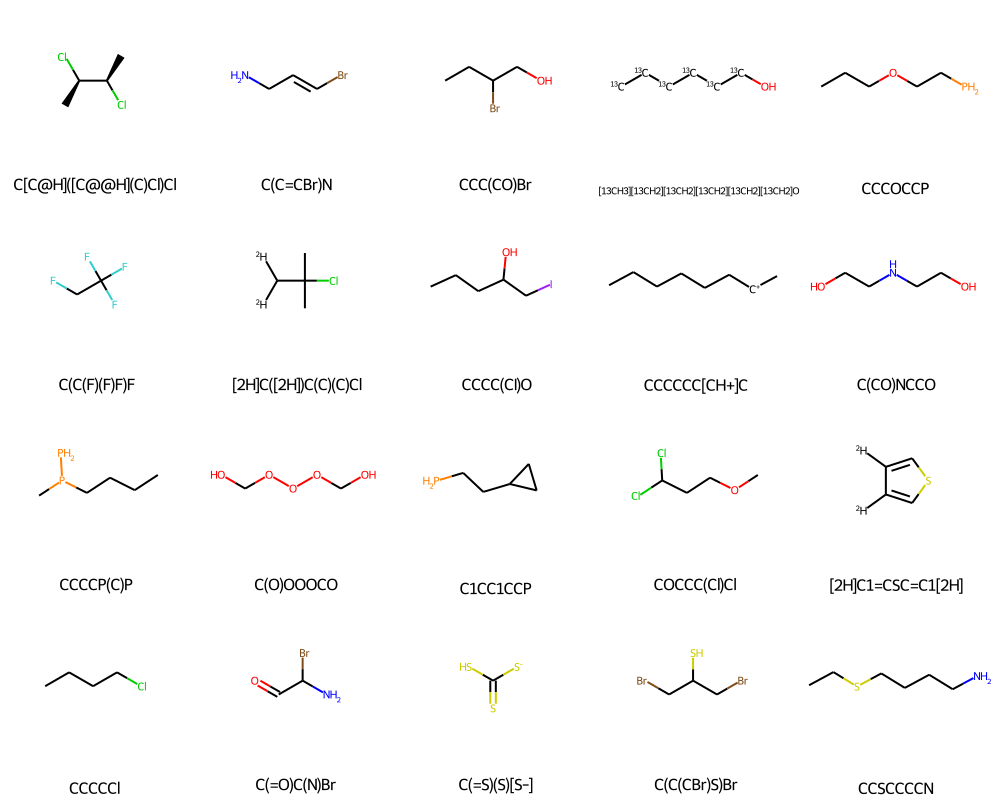

In [8]:
from rdkit.Chem import Draw
mols = df['mol'][:20]

#MolsToGridImage allows to paint a number of molecules at a time
Draw.MolsToGridImage(mols, molsPerRow=5, useSVG=True, legends=list(df['smiles'][:20].values))

**Numbers of atoms**

Since size of a molecule can be approximated by a number of atoms in it, let's extract corresponding values from MOL.
RDkit provides ***GetNumAtoms()*** and ***GetNumHeavyAtoms()*** methods for that task.

In [9]:
# AddHs function adds H atoms to a MOL (as Hs in SMILES are usualy ignored)
# GetNumAtoms() method returns a general nubmer of all atoms in a molecule
# GetNumHeavyAtoms() method returns a nubmer of all atoms in a molecule with molecular weight > 1


df['mol'] = df['mol'].apply(lambda x: Chem.AddHs(x))
df['num_of_atoms'] = df['mol'].apply(lambda x: x.GetNumAtoms())
df['num_of_heavy_atoms'] = df['mol'].apply(lambda x: x.GetNumHeavyAtoms())

Let's take look at how number of atoms is connected with target variable:

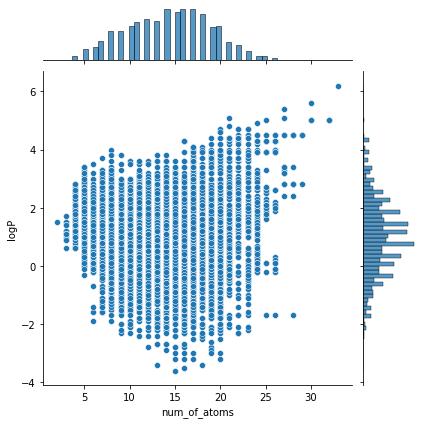

In [10]:
import seaborn as sns
sns.jointplot(df.num_of_atoms, df.logP)
plt.show()

No clear dependence is observed so we need some more features to be exctracted.
The next obvious step is to count numbers of the most common atoms.
RDkit supports subpattern search represented by ***GetSubstructMatches()*** method. It takes a MOL of a substructure pattern as an argument. So you can futher extract occurance of each pattern you'd like.

In [11]:
# First we need to settle the pattern.
c_patt = Chem.MolFromSmiles('C')

# Now let's implement GetSubstructMatches() method
print(df['mol'][0].GetSubstructMatches(c_patt))

((0,), (1,), (2,), (3,))


The method returns a tuple of tuples of positions of corresponding patterns. To extract the number of matches we need to take the length of a corresponding tuple of tuples.

In [12]:
#We're going to settle the function that searches patterns and use it for a list of most common atoms only
def number_of_atoms(atom_list, df):
    for i in atom_list:
        df['num_of_{}_atoms'.format(i)] = df['mol'].apply(lambda x: len(x.GetSubstructMatches(Chem.MolFromSmiles(i))))

number_of_atoms(['C','O', 'N', 'Cl'], df)

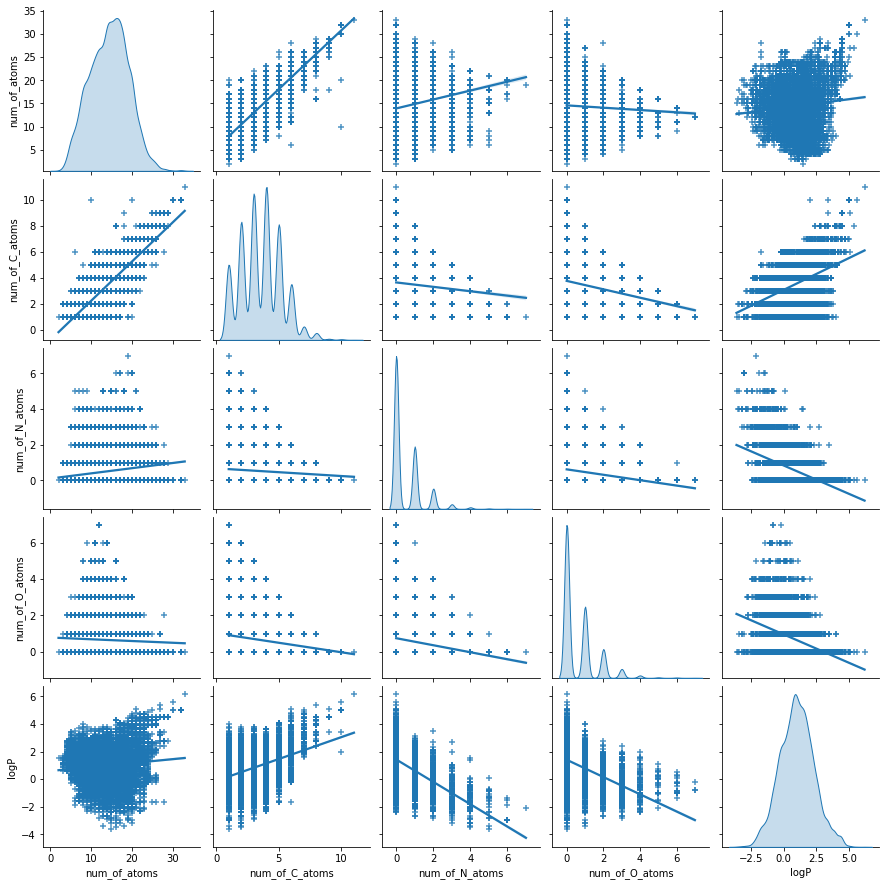

In [13]:
sns.pairplot(df[['num_of_atoms','num_of_C_atoms','num_of_N_atoms', 'num_of_O_atoms', 'logP']], diag_kind='kde', kind='reg', markers='+')
plt.show()

Looking at the bottom plots we notice some linear dependence of logP on numbers of particular atoms. We also see normal distribution of the target variable which values lie approximately from -5 to 5. Let's build our first model.
We'll count on ridge regression.

In [14]:
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import train_test_split

#Leave only features columns
train_df = df.drop(columns=['smiles', 'mol', 'logP'])
y = df['logP'].values

print(train_df.columns)

#Perform a train-test split. We'll use 10% of the data to evaluate the model while training on 90%

X_train, X_test, y_train, y_test = train_test_split(train_df, y, test_size=.1, random_state=1)


Index(['num_of_atoms', 'num_of_heavy_atoms', 'num_of_C_atoms',
       'num_of_O_atoms', 'num_of_N_atoms', 'num_of_Cl_atoms'],
      dtype='object')


Train the model and evaluate results. As an evaluation metric we can choose MAE or MSE. Evaluation function plots a number of first predictions (by default - 300).

In [15]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
def evaluation(model, X_test, y_test):
    prediction = model.predict(X_test)
    mae = mean_absolute_error(y_test, prediction)
    mse = mean_squared_error(y_test, prediction)
    
    plt.figure(figsize=(15, 10))
    plt.plot(prediction[:300], "red", label="prediction", linewidth=1.0)
    plt.plot(y_test[:300], 'green', label="actual", linewidth=1.0)
    plt.legend()
    plt.ylabel('logP')
    plt.title("MAE {}, MSE {}".format(round(mae, 4), round(mse, 4)))
    plt.show()
    
    print('MAE score:', round(mae, 4))
    print('MSE score:', round(mse,4))

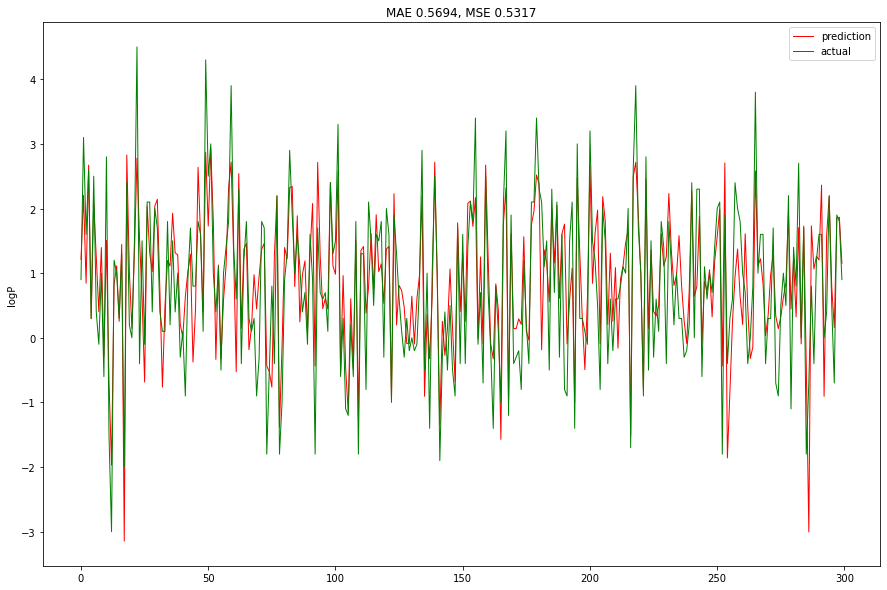

MAE score: 0.5694
MSE score: 0.5317


In [16]:
#Train the model
ridge = RidgeCV(cv=5)
ridge.fit(X_train, y_train)
#Evaluate results
evaluation(ridge, X_test, y_test)

**Offtop: particular atoms, bonds and rings**

Note that you can also extract some ring information or iterate through each molecule's atoms and bonds with RDkit. Methods ***GetRingInfo()***, ***GetAtoms()*** and ***GetBonds()*** yield corresponding generators over rings and atoms in molecule. 

Some toy examples:

In [17]:
atp = Chem.MolFromSmiles('C1=NC2=C(C(=N1)N)N=CN2[C@H]3[C@@H]([C@@H]([C@H](O3)COP(=O)(O)OP(=O)(O)OP(=O)(O)O)O)O')

# Getting number of rings with specified number of backbones
print('Number of rings with 1 backbone:', atp.GetRingInfo().NumAtomRings(1))
print('Number of rings with 2 backbones:', atp.GetRingInfo().NumAtomRings(2))

Number of rings with 1 backbone: 1
Number of rings with 2 backbones: 2


In [18]:
m = Chem.MolFromSmiles('C(=O)C(=N)CCl')
#Iterating through atoms to get atom symbols and explicit valencies 
for atom in m.GetAtoms():
    print('Atom:', atom.GetSymbol(), 'Valence:', atom.GetExplicitValence())

Atom: C Valence: 3
Atom: O Valence: 2
Atom: C Valence: 4
Atom: N Valence: 2
Atom: C Valence: 2
Atom: Cl Valence: 1


**Descriptors**

***rdkit.Chem.Descriptors*** provides a number of general molecular descriptors that can also be used to featurize a molecule. Most of the descriptors are straightforward to use from Python.

Using this package we can add some useful features to our model:
- rdkit.Chem.Descriptors.TPSA() - the surface sum over all polar atoms or molecules also including their attached hydrogen atoms;
- rdkit.Chem.Descriptors.ExactMolWt() - exact molecural weight;
- rdkit.Chem.Descriptors.NumValenceElectrons() - number of valence electrons (may illustrate general electronic density)
- rdkit.Chem.Descriptors.NumHeteroatoms() - general number of non-carbon atoms.

In [19]:
from rdkit.Chem import Descriptors
df['tpsa'] = df['mol'].apply(lambda x: Descriptors.TPSA(x))
df['mol_w'] = df['mol'].apply(lambda x: Descriptors.ExactMolWt(x))
df['num_valence_electrons'] = df['mol'].apply(lambda x: Descriptors.NumValenceElectrons(x))
df['num_heteroatoms'] = df['mol'].apply(lambda x: Descriptors.NumHeteroatoms(x))

Let's check the improvement of the model perfomance with new features.

In [20]:
train_df = df.drop(columns=['smiles', 'mol', 'logP'])
y = df['logP'].values

print(train_df.columns)

#Perform a train-test split. We'll use 10% of the data to evaluate the model while training on 90%

X_train, X_test, y_train, y_test = train_test_split(train_df, y, test_size=.1, random_state=1)

Index(['num_of_atoms', 'num_of_heavy_atoms', 'num_of_C_atoms',
       'num_of_O_atoms', 'num_of_N_atoms', 'num_of_Cl_atoms', 'tpsa', 'mol_w',
       'num_valence_electrons', 'num_heteroatoms'],
      dtype='object')


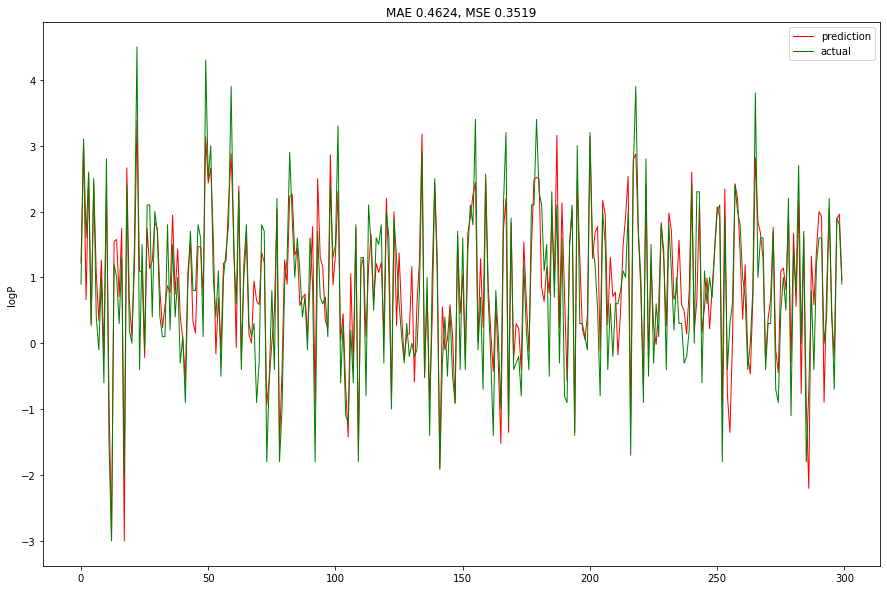

MAE score: 0.4624
MSE score: 0.3519


In [21]:
#Train the model
ridge = RidgeCV(cv=5)
ridge.fit(X_train, y_train)
#Evaluate results and plot predictions
evaluation(ridge, X_test, y_test)

**Summimg up**

RDkit is a wonderful tool to work with chemical data, especially represented as SMILES strings or in MOL format. We've seen some basic general abilities of the package but some other powerful tools are yet to be found in the docs.

Trying to improve our model perfomance at the next step we'll take a look at a copletely different way to featurize molecules. 

# mol2vec - learning vector representations of molecular subctructures

From package description 'Mol2vec is an unsupervised machine learning approach to obtain high dimensional embeddings of chemical substructures. It is based on word2vec algorithm and if word2vec learns such embeddings that vectors representing similar words group together, so should Mol2vec learn substructure embeddings where vectors of chemically related substructures end up close in vector space'. 

In other words mol2vec takes inspiration in one of the most widespread NLP technique.
Without going deep in detaials we can describe the process as following: 

**1.** A molecule is divided into substructures of a fixed radius (usually encoding distance to other atoms in bonds, i.e. radius = 1 represents a single heavy atom or a group of closest atoms around a heavy atom), substructures are encoded via [Morgan fingerprints](https://docs.chemaxon.com/display/docs/Extended+Connectivity+Fingerprint+ECFP) with the help of RDkit. Substructures reflect words in 'chemical sentences'.

**2.** These encoded substructures are fed to Word2vec yielding vector representations of substructures in a number of dimensions according to their occurance together.

**3.** Summing up substructure vectors we get vector representations of whole molecules.


The main idea behind is that we can use vector representations of molecules in different dimensions as features in supervised learning, supposing similar molecules will have close vector representations and will have close target values. 

Another wonderful point is that mol2vec provides a pre-trained model which has learned 20M different compounds with radius=1 for Morgan fingerprints.

In [ ]:
#Installing a package
!pip install git+https://github.com/samoturk/mol2vec;

We'll start from scratch with initial dataset.

In [22]:
#Load the dataset and extract target values
mdf= pd.read_csv('./logP_dataset.csv', names=['smiles', 
                                           'target'])
target = mdf['target']
mdf.drop(columns='target',inplace=True)

Once again we need to transform SMILES representations to MOL.

In [23]:
#Transforming SMILES to MOL
mdf['mol'] = mdf['smiles'].apply(lambda x: Chem.MolFromSmiles(x))


Now we'll load a pre-trained mol2vec model. It's trained with radius=1 for Morgan fingerprints to yield 300 dimensional embeddings.

In [2]:
#Loading pre-trained model via word2vec
from gensim.models import word2vec
model = word2vec.Word2Vec.load('../example_data/model_300dim.pkl')

Importing necessary functions. 

***mol2alt_sentence()*** constructs a so-called 'molecular sentence' with desired Morgan fingerprints' radius (uses RDkit backend) where 'words' are unique substructure identifiers; ***MolSentence()*** is an internal wrapper function; ***sentences2vec()*** generates molecular embeddings with the help of the trained model; ***DfVec()*** is an internal wrapper for embeddings' generator (attribute .vec yields aggregated vectors).  

In [ ]:
from mol2vec.features import mol2alt_sentence, mol2sentence, MolSentence, DfVec, sentences2vec
from gensim.models import word2vec
print('Molecular sentence:', mol2alt_sentence(mdf['mol'][1], radius=1))
print('\nMolSentence object:', MolSentence(mol2alt_sentence(mdf['mol'][1], radius=1)))
print('\nDfVec object:',DfVec(sentences2vec(MolSentence(mol2alt_sentence(mdf['mol'][1], radius=1)), model, unseen='UNK')))

Now let's implement those functions above and construct a feature matrix of vector representations.

In [ ]:
#Constructing sentences
mdf['sentence'] = mdf.apply(lambda x: MolSentence(mol2alt_sentence(x['mol'], 1)), axis=1)

#Extracting embeddings to a numpy.array
#Note that we always should mark unseen='UNK' in sentence2vec() so that model is taught how to handle unknown substructures
mdf['mol2vec'] = [DfVec(x) for x in sentences2vec(mdf['sentence'], model, unseen='UNK')]
X = np.array([x.vec for x in mdf['mol2vec']])
y = target.values

X.shape

Let's see the perfomance of the model with vector representations.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.1, random_state=1)
ridge = RidgeCV(cv=5)
ridge.fit(X_train, y_train)
evaluation(ridge, X_test, y_test)

Wow! Vector representations alone absolutely outscored features built with chemical logic. mol2vec is a really powerful tool!

Now let's put embeddings together with already constructed features to see the result.

In [ ]:
mdf = pd.DataFrame(X)
new_df = pd.concat((mdf, train_df), axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(new_df, y, test_size=.1, random_state=1)
ridge = RidgeCV(cv=5)
ridge.fit(X_train, y_train)
evaluation(ridge, X_test, y_test)

And we got the best among our results. This one is actually a rather good result even for computional chemistry.

# Classification task
We'll take another task to prove the skills. This time it's going to be a classification problem. We'll use a dataset from [MoleculeNet](http://moleculenet.ai/datasets-1) database - a benchmark for computional chemistry. There's a number of datasets for classification, so I've picked the one that is not so large - HIV dataset. From description: "The HIV dataset was introduced by the Drug Therapeutics Program (DTP) AIDS Antiviral Screen, which tested the ability to inhibit HIV replication for over 40,000 compounds. Screening results were evaluated and placed into three categories: confirmed inactive (CI),confirmed active (CA) and confirmed moderately active (CM). We further combine the latter two labels, making it a classification task between inactive (CI) and active (CA and CM)". 

In the dataset once again we can find SMILES representations and two target columns, but only 'HIV_active' is used as a benchmark.
A benchmark for Logistic Regression for this task [is ROC AUC = 0.782](http://moleculenet.ai/latest-results).
Actually I haven't dealed to find any information about how was this result achieved. The only information I could find is that 10 % of the data were used to validate and 10 % were used as test data. To make it fair we'll use 20 % of the data for the test set.

In [ ]:
import warnings
warnings.filterwarnings("ignore")
#Read the data
hiv = pd.read_csv('../input/mlchem/HIV.csv')
hiv.head()

In [ ]:
#Let's look at the target values count
sns.countplot(data = hiv, x='HIV_active', orient='v')
plt.ylabel('HIM active')
plt.xlabel('Count of values')
plt.show()

We notice great class disbalance. Now let's repeat the same approaches.
At the first step - descriptors from RDkit.

In [ ]:
#Transform SMILES to MOL
hiv['mol'] = hiv['smiles'].apply(lambda x: Chem.MolFromSmiles(x)) 

#Extract descriptors
hiv['tpsa'] = hiv['mol'].apply(lambda x: Descriptors.TPSA(x))
hiv['mol_w'] = hiv['mol'].apply(lambda x: Descriptors.ExactMolWt(x))
hiv['num_valence_electrons'] = hiv['mol'].apply(lambda x: Descriptors.NumValenceElectrons(x))
hiv['num_heteroatoms'] = hiv['mol'].apply(lambda x: Descriptors.NumHeteroatoms(x))

Train and evaluate the model.

In [ ]:
y = hiv.HIV_active.values
X = hiv.drop(columns=['smiles', 'activity','HIV_active', 'mol'])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=1)

In [ ]:
from sklearn.metrics import auc, roc_curve
def evaluation_class(model, X_test, y_test):
    prediction = model.predict_proba(X_test)
    preds = model.predict_proba(X_test)[:,1]
    fpr, tpr, threshold = roc_curve(y_test, preds)
    roc_auc = auc(fpr, tpr)
    
    plt.title('ROC Curve')
    plt.plot(fpr, tpr, 'g', label = 'AUC = %0.3f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    
    print('ROC AUC score:', round(roc_auc, 4))

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

lr = LogisticRegression()
lr.fit(X_train, y_train)

evaluation_class(lr, X_test, y_test)

And finally let's add molecular embeddings with mol2vec.

In [ ]:
#Constructing sentences
hiv['sentence'] = hiv.apply(lambda x: MolSentence(mol2alt_sentence(x['mol'], 1)), axis=1)

#Extracting embeddings to a numpy.array
#Note that we always should mark unseen='UNK' in sentence2vec() so that model is taught how to handle unknown substructures
hiv['mol2vec'] = [DfVec(x) for x in sentences2vec(hiv['sentence'], model, unseen='UNK')]
X_mol = np.array([x.vec for x in hiv['mol2vec']])
X_mol = pd.DataFrame(X_mol)

#Concatenating matrices of features
new_hiv = pd.concat((X, X_mol), axis=1)

X_train, X_test, y_train, y_test = train_test_split(new_hiv, y, test_size=.20, random_state=1)

X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

lr = LogisticRegression()
lr.fit(X_train, y_train)


evaluation_class(lr, X_test, y_test)

That's an absolutely outstanding result when comparing to best results on MoleculeNet. Even though we were unable to reproduce the split, still results show that we are very close to or even better than best results published on MoleculeNet. Incredible!

# Conclusion

We've tried a number of approaches to handle chemical data and built rather good predictive models for physical and biological properties of chemical matter with wonderful ***RDkit*** and ***mol2vec*** packages. I suppose, further feature construction can bring an even better result, but still it's shown that we are able to predict important general properties rather fast and easy, without constructing great neural networks or spending weeks on quantum calculations, which can actually be implemented in a lab if an approximated evaluation of the target is needed. Another important outcome is the fact that these approaches are suitable for both regression and classification tasks (in classification task we dealed to beat a MoleculeNet benchmark). Also I'd like to mention that ***RDkit*** allows to do many useful things that are not shown in the kernel, thus, are yet to research, if needed. The docs can be found [here](https://www.rdkit.org/docs/) and [here](https://mol2vec.readthedocs.io/en/latest/). 

Will ***mol2vec*** approach be useful in a QSAR problem solving is a question to research. But still it's a good thing to start with when it comes to ML in chemistry.

Thanks for your attention!

**References**:
 - Kaggle Datasets: LogP of Chemical Structures. https://www.kaggle.com/matthewmasters/chemical-structure-and-logp
 - Jaeger, S., Fulle, S., & Turk, S. (2018). Mol2vec: Unsupervised machine learning approach with chemical intuition. Journal of chemical information and modeling, 58(1), 27-35. URL = {http://dx.doi.org/10.1021/acs.jcim.7b00616}, eprint = {http://dx.doi.org/10.1021/acs.jcim.7b00616}
 - AIDS Antiviral Screen Data. https://wiki.nci.nih.gov/display/NCIDTPdata/AIDS+Antiviral+Screen+Data